<a href="https://www.kaggle.com/zakarianarjis/titanic-beginner?scriptVersionId=88414374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sn

# **Importing Data**

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data=pd.read_csv("../input/titanic/test.csv")

# **Data preparation**

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()
train_data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## **Features engineering and analysis** 

### Port of Embarkation effect on survivability 

In [5]:
s=train_data[['Survived','Embarked']].copy()
s=s.groupby('Embarked')['Survived'].value_counts().to_frame(name = 'counts').reset_index()
s.loc[s.Embarked=='C','%']=s['counts']*100/sum(s.loc[s.Embarked=='C'].counts)
s.loc[s.Embarked=='Q','%']=s['counts']*100/sum(s.loc[s.Embarked=='Q'].counts)
s.loc[s.Embarked=='S','%']=s['counts']*100/sum(s.loc[s.Embarked=='S'].counts)

### Family relations effect on survivability

In [6]:
k=train_data[['SibSp','Parch','Survived']].copy()
k['family relations']=k.SibSp+k.Parch
k['family relations']=k['family relations'].map(lambda x:[True,False][x==0])
k=k.groupby('Survived')['family relations'].value_counts().to_frame(name='family_relation').reset_index()
k.loc[k['family relations']==False,'%']=k['family_relation']*100/sum(k.loc[k['family relations']==False].family_relation)
k.loc[k['family relations']==True,'%']=k['family_relation']*100/sum(k.loc[k['family relations']==True].family_relation)
k

,Survived,family relations,family_relation,%
0,0,False,374,69.646182
1,0,True,175,49.435028
2,1,True,179,50.564972
3,1,False,163,30.353818


### Sex effect on survivability

In [7]:
sex=train_data[['Survived','Sex']]
sex=sex.groupby('Survived')['Sex'].value_counts().to_frame(name='counts').reset_index()
sex.loc[sex.Sex=='male','%']=sex['counts']*100/sum(sex.loc[sex.Sex=='male'].counts)
sex.loc[sex.Sex=='female','%']=sex['counts']*100/sum(sex.loc[sex.Sex=='female'].counts)

### Pclass effect on survivability

In [8]:
pclass=train_data[['Survived','Pclass']]
pclass=pclass.groupby('Survived')['Pclass'].value_counts().to_frame(name='pclasses').reset_index()
pclass.loc[pclass.Pclass==3,'%']=pclass['pclasses']*100/sum(pclass.loc[pclass.Pclass==3].pclasses)
pclass.loc[pclass.Pclass==2,'%']=pclass['pclasses']*100/sum(pclass.loc[pclass.Pclass==2].pclasses)
pclass.loc[pclass.Pclass==1,'%']=pclass['pclasses']*100/sum(pclass.loc[pclass.Pclass==1].pclasses)
pclass

,Survived,Pclass,pclasses,%
0,0,3,372,75.763747
1,0,2,97,52.717391
2,0,1,80,37.037037
3,1,1,136,62.962963
4,1,3,119,24.236253
5,1,2,87,47.282609


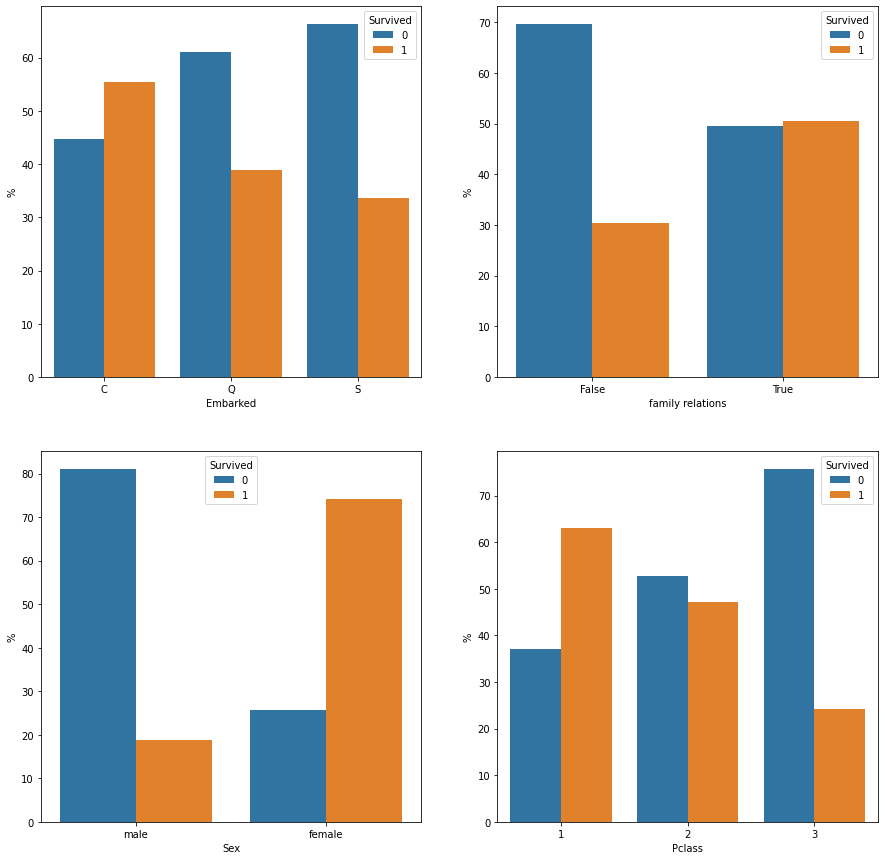

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sn.barplot(data=s,x='Embarked',hue='Survived',y='%')
plt.subplot(2,2,2)
# plt.pie(x=k.family_relation,autopct='%1.1f%%',labels=['Didn\'t survive & without family','Didn\'t survive \n & with family','Survived & with family','Survived & without a family',],shadow=True)
sn.barplot(data=k,x='family relations',hue='Survived',y='%')
plt.subplot(2,2,3)
sn.barplot(data=sex,x='Sex',hue='Survived',y='%')
plt.subplot(2,2,4)
sn.barplot(data=pclass,x='Pclass',hue='Survived',y='%')
plt.show()

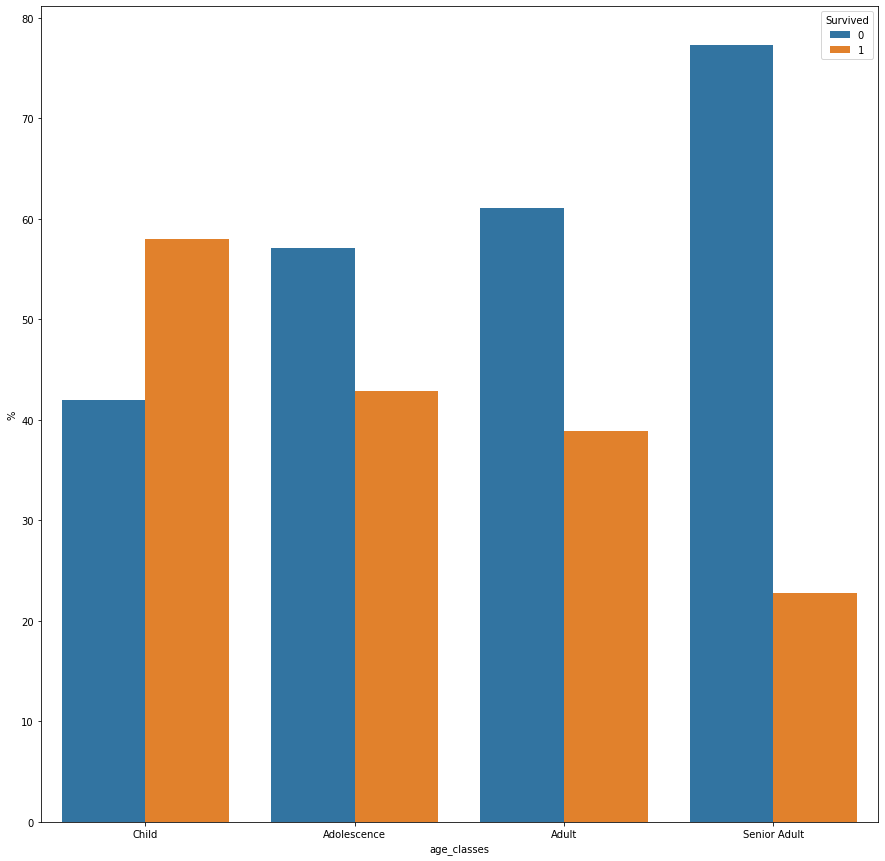

In [10]:
age=train_data[['Survived','Age']].copy()
age['age_classes']=pd.cut(age.Age,bins=[0,12,18,60,120],labels=['Child','Adolescence','Adult','Senior Adult'])
age=age.drop('Age',axis=1)
age=age.groupby('Survived')['age_classes'].value_counts().to_frame(name='counts').reset_index()
age=age.rename(columns={'level_1':'age_classes'})
age.loc[age.age_classes=='Adult','%']=age['counts']*100/sum(age.loc[age.age_classes=='Adult'].counts)
age.loc[age.age_classes=='Adolescence','%']=age['counts']*100/sum(age.loc[age.age_classes=='Adolescence'].counts)
age.loc[age.age_classes=='Child','%']=age['counts']*100/sum(age.loc[age.age_classes=='Child'].counts)
age.loc[age.age_classes=='Senior Adult','%']=age['counts']*100/sum(age.loc[age.age_classes=='Senior Adult'].counts)
plt.figure(figsize=(15,15))
sn.barplot(data=age,x='age_classes',hue='Survived',y='%')
plt.show()

### **Results interpretation**
From the results of the 4 graphs we can conclude that:
1. The Port of Embarkation  has an effect on survivability
2. Most of people without family relation (	SibSp and Parch) didn't survived which makes this feature meaningfull as choice
3. Most of females survived more than 70% of females survived and more than 80% of males didn't survive which makes this features so important.
4. More than 70 of Pclass didn't survive,in contrast with people among the first class.
5. Most of senior adults didn't survive...

# **Preparing the data for machine learning**

## **Creating Data_preporcessing function for features engineering**

In [11]:
def data_preprocessing(a:pd.DataFrame)->pd.DataFrame:
    b=a[a.columns[~a.columns.isin(['PassengerId','Name','Ticket','Fare','Cabin'])]].copy()
    b['FamilyRelations']=b.SibSp+b.Parch
    b['AgeClasses']=pd.cut(b.Age,bins=[0,12,18,60,120],labels=['Child','Adolescence','Adult','Senior Adult'])
    b.drop('Age',axis=1,inplace=True)
    b.drop('SibSp',axis=1,inplace=True)
    b.drop('Parch',axis=1,inplace=True)
    b['AgeClasses']=b['AgeClasses'].astype('object')
    return b

## **Creating pipelines**

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder())])

In [14]:
from sklearn.compose import ColumnTransformer

def full_pipeline(a:pd.DataFrame)->pd.DataFrame:
    cat=a.select_dtypes(include="object").columns
    num=a.select_dtypes(exclude="object").columns
    full= ColumnTransformer([('num',num_pipeline,num),('cat',cat_pipeline,cat)])
    b=full.fit_transform(a)
    return b

## **Creating data_preparation (all-in-one function) which gather all the previous functions**

In [15]:
features=['Pclass','Sex','Embarked','FamilyRelations','AgeClasses']
label=['Survived']
def data_preparation(a,f=features,l=label):
    d_p=data_preprocessing(a.copy())
    train_x=d_p[f]
    train_y=d_p.Survived
    train_x=full_pipeline(train_x)
    return train_x,train_y

In [16]:
train_x, train_y=data_preparation(train_data)
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# **Models training**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
forest_clf=RandomForestClassifier(random_state=42)
knc_clf=KNeighborsClassifier()

In [18]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(forest_clf,train_x,train_y,cv=10).mean()
score2=cross_val_score(knc_clf,train_x,train_y,cv=10).mean()

In [19]:
print(f'RandomForestClassifier score= {score1}')
print(f'KNeighborsClassifier   score= {score2}')

RandomForestClassifier score= 0.8204993757802747
KNeighborsClassifier   score= 0.7811235955056179


In [20]:
from sklearn.model_selection import cross_val_predict
ypred1=cross_val_predict(forest_clf,train_x,train_y,cv=10)
ypred2=cross_val_predict(knc_clf,train_x,train_y,cv=10)

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y,ypred1))
print(confusion_matrix(train_y,ypred2))

[[503  46]
 [114 228]]
[[454  95]
 [100 242]]


In [22]:
from sklearn.metrics import precision_score, recall_score
p1=precision_score(train_y,ypred1)
r1=recall_score(train_y,ypred1)
p2=precision_score(train_y,ypred2)
r2=recall_score(train_y,ypred2)
print(f'RandomForestClassifier Precision and Recall : {p1},{r1}')
print(f'KNeighborsClassifier Precision and Recall    : {p2},{r2}')

RandomForestClassifier Precision and Recall : 0.8321167883211679,0.6666666666666666
KNeighborsClassifier Precision and Recall    : 0.7181008902077152,0.7076023391812866


In [23]:
from sklearn.metrics import f1_score
print(f1_score(train_y,ypred1))
print(f1_score(train_y,ypred2))

0.7402597402597403
0.7128129602356408


In [24]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(train_y,ypred1)
a2=accuracy_score(train_y,ypred2)              
print(f'The accuracy score of the RandomForestClassifier is : {a1}')
print(f'The accuracy score of the KNeighborsClassifier is   : {a2}')

The accuracy score of the RandomForestClassifier is : 0.8204264870931538
The accuracy score of the KNeighborsClassifier is   : 0.7811447811447811


> Since we have a rare positive class of labels, we should be looking for the model with the best precision and as we can see from previous results the randomforestclassifier is the best choice for our dataset.

# **Fine-Tuning RandomForestClassifier model**

In [25]:
param_grid = [{'n_estimators': [50,100,120,150], 'max_features': [2, 4, 6, 8,10,11]},{'bootstrap': [False], 'n_estimators': [50,100,120,150], 'max_features': [2, 4, 6, 8,10,11]},]

In [26]:
#The evaluation metric for this competition is accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,scoring='accuracy',return_train_score=True)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 11],
                          'n_estimators': [50, 100, 120, 150]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 6, 8, 10, 11],
                          'n_estimators': [50, 100, 120, 150]}],
             return_train_score=True, scoring='accuracy')

In [27]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_features': 4, 'n_estimators': 100}
0.8216229712858926


In [28]:
fors=RandomForestClassifier(random_state=42)
fors.set_params(**grid_search.best_params_)
ypredt=cross_val_predict(fors,train_x,train_y,cv=10)
print(precision_score(train_y,ypredt))
print(recall_score(train_y,ypredt))

0.8327272727272728
0.6695906432748538


# **Prediction of test data set & submission**

In [29]:
test_data_ready=full_pipeline(data_preprocessing(test_data.copy()))
test_data_y=grid_search.predict(test_data_ready)
test_data_y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

###  **Submission**

In [30]:
my_submission=pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':test_data_y})
my_submission.to_csv('submission.csv', index=False)